| Var&$$(a, \sigma^2)$$| $$\gamma$$ | n | M | K | С.В. Z | С.В. W |
| --- | --- | --- | --- | --- | --- | --- |
| 5 (-1;16) | 0.9 | 16 | 1950 | 180 | $$Z =  \dfrac{(n-1)S^2}{\sigma^2} $$| $$W=\frac{1}{4}\sum_{i=1}^{4}U_i$$ $$Где\ U_i\ -\ случайная\ выборка\newline из\ 4\ значений\ св\ U,\newline имеющей\ распределение\ \chi^2(3)$$|


In [262]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import statistics

In [263]:
# consts
n = 16
a = -1
sigma = math.sqrt(16)
gamma = 0.9
M = 1950
K = 180

# Часть I





## 1.

(array([10., 23., 46., 74., 90., 91., 84., 46., 26., 10.]),
 array([-4.40507654, -3.33192776, -2.25877898, -1.1856302 , -0.11248142,
         0.96066735,  2.03381613,  3.10696491,  4.18011369,  5.25326246,
         6.32641124]),
 <BarContainer object of 10 artists>)

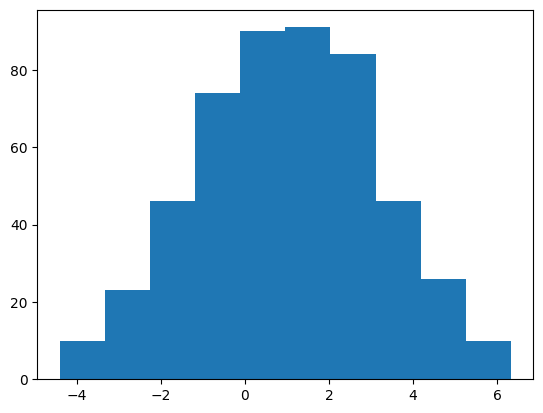

In [280]:
a =1 
sigma = 2
n = 500

sample = np.random.normal(loc=a, scale=sigma, size=n)

### 1.1 
Найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X известна

In [265]:
mean = sample.mean()
t = stats.norm.ppf((gamma/2)+0.5)
delta = t*sigma/math.sqrt(n)

In [266]:
print(f"Доверительный интервал для матожидания а \nпри известной дисперсии sigma = {sigma} при gamma = {gamma}: \n({mean - delta}, {mean + delta})")

Доверительный интервал для матожидания а 
при известной дисперсии sigma = 2 при gamma = 0.9: 
(0.8176475415309999, 1.1118879033630458)


In [267]:
print(f"Доверительный интервал by python: \n{stats.norm.interval(confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(n))}")

Доверительный интервал by python: 
(0.8176475415309998, 1.1118879033630458)


### 1.2
Найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X НЕ известна

In [268]:
t = stats.t(n - 1).ppf(((1+gamma)/2))
my_sigma = statistics.variance(sample)
delta = t*np.sqrt(my_sigma)/np.sqrt(n)
print(
    f"Доверительный интервал для матожидания а \nпри неизвестной дисперсии sigma = {sigma} при gamma = {gamma}: \n({mean - delta}, {mean + delta})")
print(
    f"Доверительный интервал by python: \n{stats.t.interval(gamma, len(sample)-1, loc=np.mean(sample), scale=stats.sem(sample))}")
# stats.sem - Calculate the standard error of the mean (or standard error of measurement) of the values in the input array.

Доверительный интервал для матожидания а 
при неизвестной дисперсии sigma = 2 при gamma = 0.9: 
(0.8201792842161133, 1.1093561606779323)
Доверительный интервал by python: 
(0.8201792842161132, 1.1093561606779323)


### 1.3
Найти интервальную оценку (доверительный интервал) для дисперссии


In [269]:
def estimation_of_variance(sample, n_points, n_gamma):
    q1 = (1 - n_gamma)/2
    q2 = (1 + n_gamma)/2
    xq1 = stats.chi2(n_points-1).ppf(q1)
    xq2 = stats.chi2(n_points-1).ppf(q2)
    return ((n_points-1)*statistics.variance(sample)/xq2, (n_points-1)*statistics.variance(sample)/xq1)


print(
    f"Доверительный интервал для дисперсии sigma при gamma = {gamma}: {estimation_of_variance(sample, n, gamma)})")

Доверительный интервал для дисперсии sigma при gamma = 0.9: (3.479134780284828, 4.285469631440114))


## 2
Зависимость длины доверительного интервала от надежности при неизменном объеме выборки

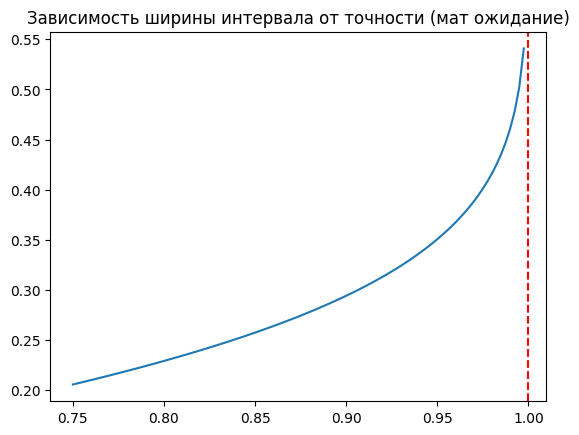

In [270]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma = gamma_0+i*h
    tmp = stats.norm.interval(
        confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(n))
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma)

plt.plot(arr_gamma, bounds)
plt.title("Зависимость ширины интервала от точности (мат ожидание)")
plt.axvline(x=1, color='red', label='axvline - full height', linestyle='--')

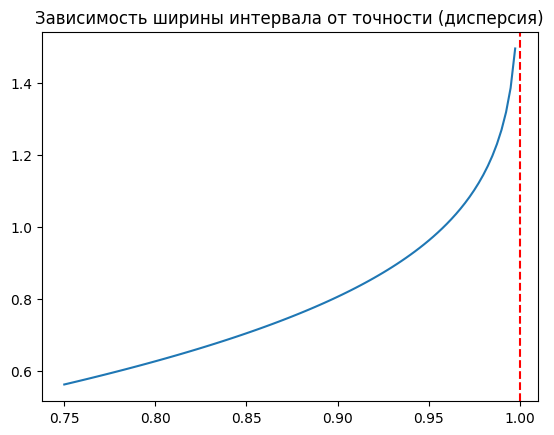

In [271]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma = gamma_0+i*h
    tmp = estimation_of_variance(sample, n, gamma)
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma)

plt.plot(arr_gamma, bounds)
plt.title("Зависимость ширины интервала от точности (дисперсия)")
plt.axvline(x=1, color='red', label='axvline - full height', linestyle='--')

## 3
Построить зависимость длины доверительного интервала от объема выборки при неизменной надежности

Text(0.5, 1.0, 'Зависимость ширины интервала от длины выборки (мат ожидание)')

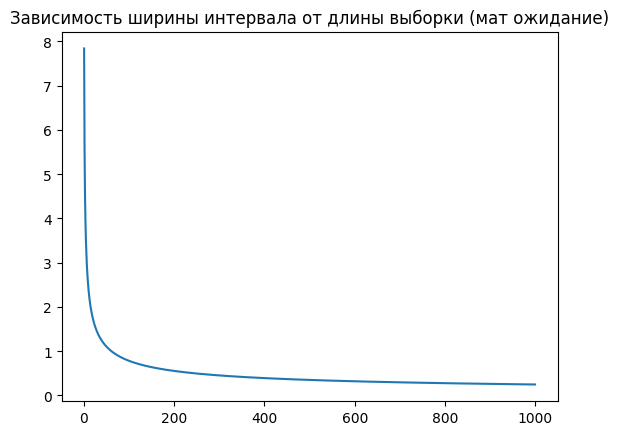

In [272]:
gamma = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(1, 1000):
    # sample = np.random.normal(loc=a, scale=sigma, size=i)
    tmp = stats.norm.interval(
        confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(i))
    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)


plt.plot(arr_len, bounds)
plt.title("Зависимость ширины интервала от длины выборки (мат ожидание)")

Text(0.5, 1.0, 'Зависимость ширины интервала от длины выборки (дисперсия)')

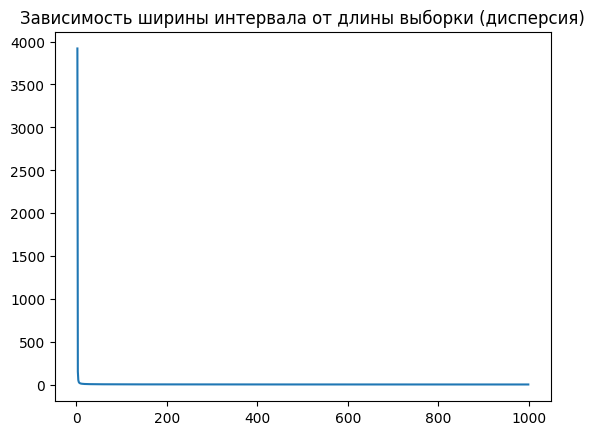

In [273]:
gamma = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(1, 1000):
    # sample = np.random.normal(loc=a, scale=sigma, size=i)
    tmp = estimation_of_variance(sample, i, gamma)
    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)


plt.plot(arr_len, bounds)
plt.title("Зависимость ширины интервала от длины выборки (дисперсия)")

In [274]:
stats.t.interval(confidence=0.95, df=len(sample)-1,
                 loc=np.mean(sample), scale=stats.sem(sample))

(0.7923817063544523, 1.1371537385395933)

## 4
Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a, sigma^2)

In [275]:
bounds.clear()
l = []
r = []
for i in range(M):
    sample = np.random.normal(loc=a, scale=sigma, size=n)
    tmp = stats.norm.interval(
        confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(n))
    bounds.append(tmp)
    l.append(tmp[0])
    r.append(tmp[1])
x_l = pd.Series(data=l)
x_r = pd.Series(data=r)

count = ((x_l < a) & (x_r > a)).sum()
print(f"Оценка гамма = {count/M}")

Оценка гамма = 0.9482051282051283


## 5 
Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (a, sigma^2)
### 5.1
По каждой из M выборок найти наблюдаемое значение случайной величины Z
(описание случайной величины Z приведено в Вашем варианте)



In [283]:
sample_z = []
for i in range(M):
    sample_i = np.random.normal(loc=a, scale=sigma, size=n)
    mean_i = statistics.mean(sample_i)
    s2_i = statistics.variance(sample_i)
    sample_z.append((n-1)*s2_i/sigma**2)



### 5.2
Каков закон распределения случайной величины Z? 

утверждение: случайная величина Z имеет нормальный закон распредления

почему: в силу ЦПТ

### 5.3
По выборке из M значений случайной величины Z найти выборочные числовые
характеристики ее распределения.


In [297]:
my_mean_z = statistics.mean(sample_z)
my_variacne_z = statistics.variance(sample_z) #Несмещенная дисперсия
my_pvariance_z = statistics.pvariance(sample_z) #Смещенная дисперсия
my_dev_z = math.sqrt(my_variacne_z)
my_skewness_z = stats.skew(sample_z)
my_kurtosis_z = stats.kurtosis(sample_z)
print(f'mean - {my_mean_z}, \nvariacne - {my_variacne_z}, \ndev - {my_dev_z}, \nSkewness - {my_skewness_z}, \nKurtosis - {my_kurtosis_z}')
print (f'Pvariance - {my_pvariance_z}')

mean - 497.5062362747292, 
variacne - 1001.7221487621761, 
dev - 31.649994451218724, 
Skewness - 0.14067422354650072, 
Kurtosis - 0.25287069288523645
Pvariance - 1001.2084450961443


### 5.4 
Построить гистограмму относительных частот и теоретическую кривую
распределения случайной величины Z, а также ящичковую диаграмму

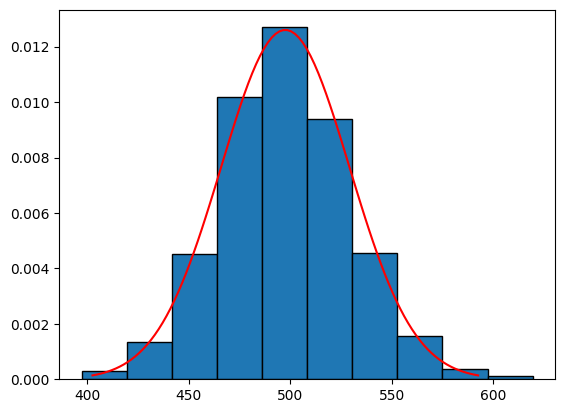

In [301]:
plt.hist(
    sample_z, edgecolor="black", density=True)
x = np.linspace(my_mean_z-3*my_dev_z, my_mean_z+3*my_dev_z, 100)
plt.plot(x, stats.norm.pdf(x, loc=statistics.mean(sample_z),
         scale=statistics.variance(sample_z)**0.5), color='red')
plt.show()

,0
0.25,476.760711
0.50,496.923131
0.75,518.154984


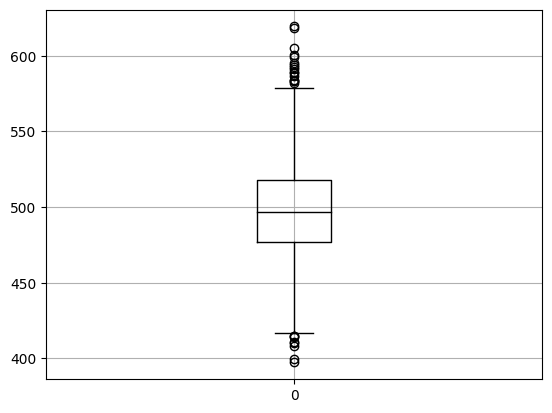

In [302]:
data = pd.DataFrame(sample_z)
data.boxplot(color = "black")
data.quantile([0.25, 0.5, 0.75])


# II часть